In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # Calculate absolute errors: |f - F|
    e = numpy.abs(f - F)
    
    # Calculate relative errors: |f - F| / |f|
    epsilon = numpy.finfo(float).eps
    r = numpy.abs(e / (numpy.abs(f) + epsilon))
    
    # Calculate precision, rounded to the nearest decimal place
    with numpy.errstate(divide='ignore', invalid='ignore'):
        p = numpy.round(-numpy.log10(r + epsilon)).astype(int)
    
    return e, r, p



In [4]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array inumpyut
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [5]:
# you can put some working code here to generate your answers, but put your answers in the cell below
# Define the true value of pi and the two rational approximations
f = numpy.pi
F1 = 22 / 7
F2 = 355 / 113

# Calculate errors for the first approximation (22/7)
e1, r1, p1 = errors(f, F1)

# Calculate errors for the second approximation (355/113)
e2, r2, p2 = errors(f, F2)

# Print the results
print(f"Errors for 22/7 approximation:")
print(f"Absolute error: {e1}")
print(f"Relative error: {r1}")
print(f"Precision: {p1} decimal places\n")

print(f"Errors for 355/113 approximation:")
print(f"Absolute error: {e2}")
print(f"Relative error: {r2}")
print(f"Precision: {p2} decimal places")

Errors for 22/7 approximation:
Absolute error: 0.0012644892673496777
Relative error: 0.0004024994347707008
Precision: 3 decimal places

Errors for 355/113 approximation:
Absolute error: 2.667641894049666e-07
Relative error: 8.49136787674061e-08
Precision: 7 decimal places


### Comparison of Rational Approximations for π

Absolute error, relative error, and degree of precision for two rational approximations of π:

1. $f = \pi$ and $F = \frac{22}{7}$
2. $f = \pi$ and $F = \frac{355}{113}$

#### Results:

**For $\frac{22}{7}$:**
- Absolute error: 0.00126
- Relative error: $4.02 \times 10^{-4}$
- Precision: **3 decimal places**

**For $\frac{355}{113}$:**
- Absolute error: $2.67 \times 10^{-7}$
- Relative error: $8.49 \times 10^{-8}$
- Precision: **7 decimal places**

#### Conclusion:
The approximation $\frac{355}{113}$ is **much more accurate** than $\frac{22}{7}$, with a much smaller absolute and relative error, and a higher precision of **7 decimal places** compared to just **3 decimal places** for $\frac{22}{7}$.


**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [6]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m, n: int
        numerator and denominator of best d-digit rational approximation to pi ~ m/n
    '''
    
    # Set the range for d-digit integers: [10^(d-1), 10^d - 1]
    lower_bound = 10**(d-1)
    upper_bound = 10**d - 1
    
    # Initialize the best approximation and smallest error
    best_m, best_n = None, None
    smallest_error = float('inf')
    
    # Iterate over all possible values of n (denominator) in the d-digit range
    for n in range(lower_bound, upper_bound + 1):
        # Find the closest integer m (numerator) for this n
        m = round(numpy.pi * n)
        
        # Ensure that m is also within the d-digit range
        if lower_bound <= m <= upper_bound:
            # Calculate the approximation error |pi - m/n|
            error = abs(numpy.pi - (m / n))
            
            # Update the best (m, n) if this error is the smallest so far
            if error < smallest_error:
                best_m, best_n = m, n
                smallest_error = error
    
    return best_m, best_n

In [7]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 1
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 3
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 8

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

C:\Users\apanc\AppData\Local\Temp\ipykernel_52504\1900989224.py:20: RuntimeWarning: divide by zero encountered in true_divide
  relative_error_large = numpy.abs(f_values_large - F_values_large) / f_values_large


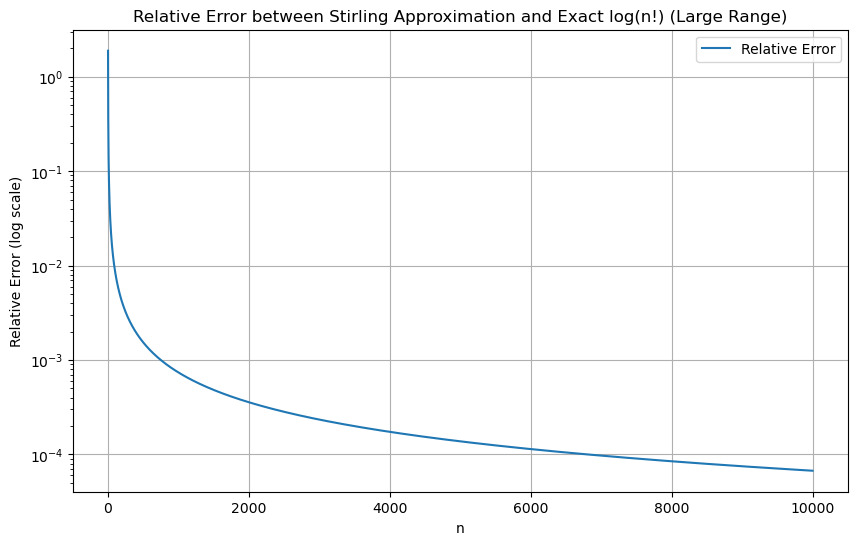

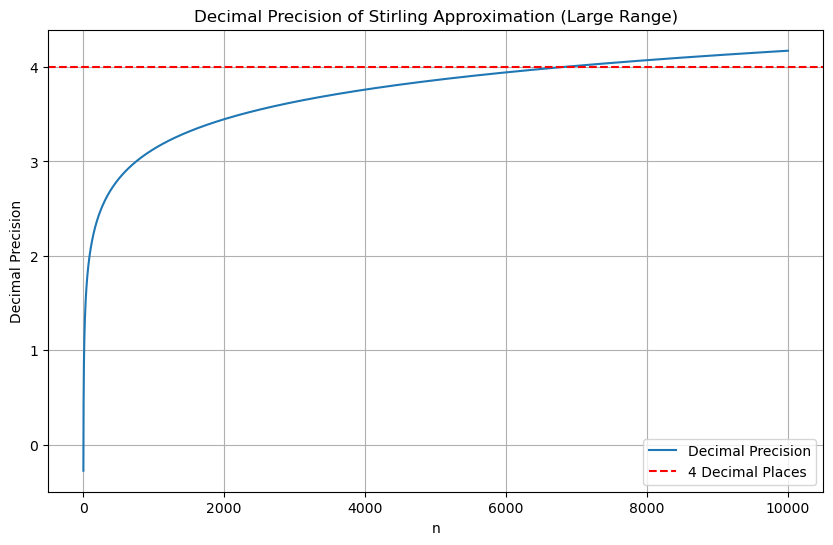

6813

In [13]:
import math

# Define Stirling's approximation and the exact log(n!)
def stirling_approximation(n):
    if n == 0:
        return 0  # log(0!) is 0
    return n * numpy.log(n) - n

def exact_log_factorial(n):
    return math.lgamma(n + 1)  # log(n!)

# Extending the range to even larger values of n
n_values_large = numpy.arange(1, 10001)  # Extend up to 10,000

# Compute Stirling's approximation and exact values for the larger range
F_values_large = numpy.array([stirling_approximation(n) for n in n_values_large])
f_values_large = numpy.array([exact_log_factorial(n) for n in n_values_large])

# Compute relative error and precision for the larger range
relative_error_large = numpy.abs(f_values_large - F_values_large) / f_values_large
decimal_precision_large = -numpy.log10(relative_error_large)

# Avoid small values where relative error is not valid and filter infinities
valid_large_indices = numpy.isfinite(relative_error_large) & (relative_error_large > 0)

# Filter values for the larger range
n_values_filtered_large = n_values_large[valid_large_indices]
relative_error_filtered_large = relative_error_large[valid_large_indices]
decimal_precision_filtered_large = decimal_precision_large[valid_large_indices]

# Find the smallest n where Stirling's approximation is good to 4 decimal places
n_good_approx_large = numpy.min(n_values_filtered_large[decimal_precision_filtered_large >= 4])

# Plotting relative error (filtered for larger range)
plt.figure(figsize=(10, 6))
plt.plot(n_values_filtered_large, relative_error_filtered_large, label='Relative Error')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Relative Error (log scale)')
plt.title('Relative Error between Stirling Approximation and Exact log(n!) (Large Range)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting decimal precision (filtered for larger range)
plt.figure(figsize=(10, 6))
plt.plot(n_values_filtered_large, decimal_precision_filtered_large, label='Decimal Precision')
plt.axhline(4, color='red', linestyle='--', label='4 Decimal Places')
plt.xlabel('n')
plt.ylabel('Decimal Precision')
plt.title('Decimal Precision of Stirling Approximation (Large Range)')
plt.grid(True)
plt.legend()
plt.show()

# Display the smallest n where Stirling's approximation is good to 4 decimal places
n_good_approx_large

YOUR ANSWER HERE

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


In [14]:
from sympy import symbols, O

# Define the variable for the series expansion
dx = symbols('dx')

# Define the Taylor expansions for the two functions
f1 = 1 + dx + dx**2 + dx**3 + O(dx**4)
f2 = 1 + dx**2/2 + dx**4/24 + O(dx**6)

# Sum of the two series
sum_series = f1 + f2

# Product of the two series
product_series = (f1 * f2).expand()

# Display the results
sum_series, product_series

(2 + dx + 3*dx**2/2 + dx**3 + O(dx**4),
 1 + dx + 3*dx**2/2 + 3*dx**3/2 + O(dx**4))

$$O{\Delta x^4}$$

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

YOUR ANSWER HERE

**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

YOUR ANSWER HERE

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inumpyuts, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [ ]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return Tn, MAX_N

In [ ]:
# Feel free to test your code here and/or make a plot of errors

In [ ]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

YOUR ANSWER HERE

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

YOUR ANSWER HERE

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

YOUR ANSWER HERE